## Project five: Communicate data findings: Ford go bike trip data 2019

### Introduction
This Dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import the required librairies for investigation of the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# download the selected data 
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.shape # this dataset includes 183412 rows with 16 features

(183412, 16)

In [4]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
177529,162,2019-02-01 20:49:13.5110,2019-02-01 20:51:55.5400,14.0,Clay St at Battery St,37.795001,-122.399970,11.0,Davis St at Jackson St,37.797280,-122.398436,4806,Subscriber,1996.0,Female,No
49466,130,2019-02-21 21:42:27.6620,2019-02-21 21:44:37.7690,349.0,Howard St at Mary St,37.781010,-122.405666,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,138,Subscriber,1985.0,Male,No
48349,243,2019-02-22 07:57:45.6520,2019-02-22 08:01:48.7820,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,343.0,Bryant St at 2nd St,37.783172,-122.393572,6382,Subscriber,1961.0,Male,No
57092,712,2019-02-21 08:29:51.7090,2019-02-21 08:41:44.2770,109.0,17th St at Valencia St,37.763316,-122.421904,81.0,Berry St at 4th St,37.775880,-122.393170,4999,Subscriber,1991.0,Male,No
122983,1049,2019-02-11 09:52:32.6030,2019-02-11 10:10:02.1880,196.0,Grand Ave at Perkins St,37.808894,-122.256460,187.0,Jack London Square,37.796248,-122.279352,308,Subscriber,1984.0,Male,No
86125,615,2019-02-17 13:33:04.2880,2019-02-17 13:43:20.2060,249.0,Russell St at College Ave,37.858473,-122.253253,171.0,Rockridge BART Station,37.844279,-122.251900,1155,Subscriber,1972.0,Female,No
6730,997,2019-02-28 09:38:00.0510,2019-02-28 09:54:37.9500,156.0,Stanford Ave at Hollis St,37.838443,-122.288665,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,5613,Subscriber,1981.0,Male,No
105857,611,2019-02-13 20:03:35.9090,2019-02-13 20:13:46.9640,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,243.0,Bancroft Way at College Ave,37.869360,-122.254337,6403,Subscriber,1998.0,Male,Yes
95401,962,2019-02-15 13:44:33.5490,2019-02-15 14:00:36.4110,13.0,Commercial St at Montgomery St,37.794231,-122.402923,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4941,Subscriber,1974.0,Male,Yes
13119,616,2019-02-27 16:48:29.0550,2019-02-27 16:58:45.9450,90.0,Townsend St at 7th St,37.771058,-122.402717,368.0,Myrtle St at Polk St,37.785434,-122.419622,6332,Subscriber,1985.0,Female,No


#### Questions:
After review of the features of the above data; my focus will be on the below questions:
1. How long does the average trip take? 
2. When are most trips taken in terms of time of day, day of the week, or day of the month of february?
3. Does the above depend on if a user is a subscriber or customer?
4. What is the average age of bike users?
5. Are female customers'trip average time more than males'trip average time?
6. Which are the most 10 stations with the higher number of starting trip?

### Assessing Data
Based on the first overview of the data, it seems that it should be wrangled and adjusted a little bit for more quality and tidiness.

In [5]:
# visually assessing the data 
df.head() #Quality issues: Trip duration is set in seconds 
# it will be more useful in minutes, start_time and End_time
# include the date and time combined they are more useful if they are 
#  classified as date, name of the week or other, 
# start_station_id and end_station_id are floats
# birth year is a float and it will be more useful as age
# Based on our focus, latitude and longitude start and end stations should be dropped!

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
# programmatic Assessment of data
df.info() #start and end time are object, start_station_id and
            # end_station_id are floats, member_birth_year is a float
            # bike_id is an integer.
            # user_type, gender and bike_share_for_all_trip are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [7]:
#searching for duplicated data
df.duplicated().sum() # no duplicate data

0

In [8]:
df.describe() # 75% of the population have a  trip less than 796 seconds 
        # the minimum of member patient years is 1878 year which is not logic 
    # this is a typo error
    # since we will not focus on the latitude and longitude of start and end stations
    # it will be better that we drop them

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [9]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

## Quality issues: 
1. Change the Trip duration from seconds to minutes
2. Change the start_time and end_time to date and time and calculate the day of the week, the day of the month, the starting hour
3. Change start_station_id, end_station_id and bike_id to object
4. Change member year birth to integer and calculate the age
5. User_type, gender and bike_share_for_all_trip change to category
6. Typo error in the member_patient_year 1878,1900 and others where the age is more than 85
7. Drop columns start_station_latitude, start_station_longitude, end_station_latitude and end_station_longitude. 

## Cleaning Data
Now let's clean the data but before cleaning we will copy it

In [10]:
# create a copy of the original dataframe
df_clean= df.copy()

### Define
Change the Trip duration from seconds to minutes

### Code 

In [11]:
df_clean['duration_min']=df_clean['duration_sec']/60

### Test

In [12]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.683333
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667


### Define
Change start_time and end_time to timestamp
Change start_station_id, end_station_id and bike_id to object
User_type, gender and bike_share_for_all_trip change to category

### Code

In [13]:
# Change the start_time and end_time to timestamp
df_clean['start_time']=pd.to_datetime(df_clean['start_time'])
df_clean['end_time']=pd.to_datetime(df_clean['end_time'])

In [14]:
# change the type of start_station_id, end_station_id and bike_id to object
df_clean.start_station_id=df_clean.start_station_id.astype(str)
df_clean.end_station_id=df_clean.end_station_id.astype(str)
df_clean.bike_id=df_clean.bike_id.astype(str)

In [15]:
df_clean['start_station_id'] = df_clean['start_station_id'].map(lambda x: str(x)[:-2])
df_clean['end_station_id'] = df_clean['end_station_id'].map(lambda x: str(x)[:-2])

In [16]:
# change the user_type, gender and bike_share_for_all_trip ot category
df_clean.user_type=df_clean.user_type.astype('category')
df_clean.member_gender=df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip=df_clean.bike_share_for_all_trip.astype('category')

### Test

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183412 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183412 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null object
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null category
bike_share_for_all_trip    183412 non-null category
duration_min               183412 non-null float64
dtypes: cate

### Define
Typo error in the member patient year 1878, 1900 and 1934 where age is more than 85

### Code

In [18]:
# calculate the value counts for member_birth_year
df_clean.member_birth_year.value_counts()

1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
1991.0     8498
1992.0     8250
1987.0     8018
1986.0     7973
1994.0     7660
1995.0     7423
1985.0     7028
1984.0     6562
1983.0     5954
1980.0     5024
1982.0     4990
1996.0     4640
1981.0     4345
1979.0     3756
1997.0     3481
1998.0     3208
1978.0     2830
1977.0     2725
1974.0     2633
1999.0     2528
1975.0     2503
1976.0     2442
1973.0     2080
1968.0     1928
1971.0     1924
1972.0     1909
          ...  
1954.0      301
1952.0      189
1951.0      180
1950.0      178
1953.0      158
1947.0      135
1955.0      134
1945.0      105
1949.0       99
1931.0       89
1900.0       53
1948.0       51
2001.0       34
1943.0       30
1942.0       21
1933.0       20
1946.0       19
1902.0       11
1939.0       11
1941.0        9
1901.0        6
1938.0        3
1920.0        3
1934.0        2
1944.0        2
1930.0        1
1910.0        1
1927.0        1
1928.0        1
1878.0        1
Name: member_birth_year,

In [19]:
#Calculate the percentage of users where age is more than 85
len(df_clean[df_clean['member_birth_year']<1934])/len(df_clean)
# remove the rows where the age is more than 85

0.0010195625149935664

In [20]:
df_clean=df_clean.query('member_birth_year>=1934')

In [21]:
#calculate the age of user based on the year of dataset (2019)
df_clean['user_age']=2019-df_clean['member_birth_year']

### Test

In [22]:
df_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,user_age
52970,1032,2019-02-21 16:26:39.994,2019-02-21 16:43:52.510,19,Post St at Kearny St,37.788975,-122.403452,121,Mission Playground,37.759210,-122.421339,5814,Subscriber,1958.0,Male,No,17.200000,61.0
60864,586,2019-02-20 18:09:25.775,2019-02-20 18:19:11.878,176,MacArthur BART Station,37.828410,-122.266315,196,Grand Ave at Perkins St,37.808894,-122.256460,1074,Subscriber,1991.0,Male,No,9.766667,28.0
52726,683,2019-02-21 16:52:51.442,2019-02-21 17:04:14.943,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,5541,Subscriber,1992.0,Male,No,11.383333,27.0
165367,326,2019-02-05 07:18:21.509,2019-02-05 07:23:48.275,219,Marston Campbell Park,37.809824,-122.280192,160,West Oakland BART Station,37.805318,-122.294837,616,Subscriber,1989.0,Female,Yes,5.433333,30.0
70395,380,2019-02-19 18:22:07.518,2019-02-19 18:28:28.213,180,Telegraph Ave at 23rd St,37.812678,-122.268773,202,Washington St at 8th St,37.800754,-122.274894,4503,Subscriber,1976.0,Male,No,6.333333,43.0


In [23]:
# Check if all member_birth_year below 1934 are removed
len(df_clean[df_clean['member_birth_year']<1934])

0

### Define
Drop columns start_station_latitude, start_station_longitude, end_station_latitude and end_station_longitude. 

### Code

In [24]:
cols=['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']
df_clean.drop(cols, axis=1, inplace=True)

### Test

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174960 entries, 0 to 183411
Data columns (total 14 columns):
duration_sec               174960 non-null int64
start_time                 174960 non-null datetime64[ns]
end_time                   174960 non-null datetime64[ns]
start_station_id           174960 non-null object
start_station_name         174765 non-null object
end_station_id             174960 non-null object
end_station_name           174765 non-null object
bike_id                    174960 non-null object
user_type                  174960 non-null category
member_birth_year          174960 non-null float64
member_gender              174960 non-null category
bike_share_for_all_trip    174960 non-null category
duration_min               174960 non-null float64
user_age                   174960 non-null float64
dtypes: category(3), datetime64[ns](2), float64(3), int64(1), object(5)
memory usage: 16.5+ MB


### Define
calculate the day of the week and the month of the year with the starting hour and starting date from the start_time variable

### Code

In [26]:
# extract the starting (date, hour, weekday and month) from the 
# start_time noting that 0 in weekday expresses Mondays and 0
# in month expresses January's
df_clean['start_date']=df_clean['start_time'].dt.date
df_clean['start_hour']=df_clean['start_time'].dt.strftime('%H')
df_clean['start_weekday'] = df_clean['start_time'].dt.strftime('%A')
df_clean['start_day']=df_clean['start_time'].dt.day

In [27]:
df_clean.sample(6)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,user_age,start_date,start_hour,start_weekday,start_day
86179,924,2019-02-17 13:18:07.608,2019-02-17 13:33:31.935,3,Powell St BART Station (Market St at 4th St),343,Bryant St at 2nd St,4991,Subscriber,1985.0,Male,No,15.400000,34.0,2019-02-17,13,Sunday,17
152247,525,2019-02-06 16:10:11.411,2019-02-06 16:18:56.985,104,4th St at 16th St,27,Beale St at Harrison St,5286,Subscriber,1966.0,Female,No,8.750000,53.0,2019-02-06,16,Wednesday,6
52354,810,2019-02-21 17:11:39.174,2019-02-21 17:25:09.833,81,Berry St at 4th St,19,Post St at Kearny St,2458,Subscriber,1992.0,Male,No,13.500000,27.0,2019-02-21,17,Thursday,21
51145,210,2019-02-21 18:23:34.509,2019-02-21 18:27:05.434,241,Ashby BART Station,385,Woolsey St at Sacramento St,4577,Subscriber,1993.0,Male,No,3.500000,26.0,2019-02-21,18,Thursday,21
143919,580,2019-02-07 13:48:43.833,2019-02-07 13:58:24.227,193,Grand Ave at Santa Clara Ave,179,Telegraph Ave at 27th St,4549,Subscriber,1968.0,Male,Yes,9.666667,51.0,2019-02-07,13,Thursday,7
104332,359,2019-02-14 08:42:34.905,2019-02-14 08:48:34.883,200,2nd Ave at E 18th St,163,Lake Merritt BART Station,1277,Subscriber,1992.0,Male,No,5.983333,27.0,2019-02-14,08,Thursday,14


In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174960 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               174960 non-null int64
start_time                 174960 non-null datetime64[ns]
end_time                   174960 non-null datetime64[ns]
start_station_id           174960 non-null object
start_station_name         174765 non-null object
end_station_id             174960 non-null object
end_station_name           174765 non-null object
bike_id                    174960 non-null object
user_type                  174960 non-null category
member_birth_year          174960 non-null float64
member_gender              174960 non-null category
bike_share_for_all_trip    174960 non-null category
duration_min               174960 non-null float64
user_age                   174960 non-null float64
start_date                 174960 non-null object
start_hour                 174960 non-null object
start_weekday              174960 non-null object
start_day      

In [29]:
# drop start time and end time columns, and the member_birth_year
df_clean.drop(['start_time','end_time','member_birth_year'], axis=1, inplace=True)

In [30]:
#change the type of start_date to datetime 
df_clean.start_date=pd.to_datetime(df_clean.start_date)

In [31]:
#test 
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174960 entries, 0 to 183411
Data columns (total 15 columns):
duration_sec               174960 non-null int64
start_station_id           174960 non-null object
start_station_name         174765 non-null object
end_station_id             174960 non-null object
end_station_name           174765 non-null object
bike_id                    174960 non-null object
user_type                  174960 non-null category
member_gender              174960 non-null category
bike_share_for_all_trip    174960 non-null category
duration_min               174960 non-null float64
user_age                   174960 non-null float64
start_date                 174960 non-null datetime64[ns]
start_hour                 174960 non-null object
start_weekday              174960 non-null object
start_day                  174960 non-null int64
dtypes: category(3), datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 17.9+ MB


## Storing Data
Save assessed and cleaned master dataset to a CSV file named "master_gobike_data.csv"

In [32]:
# store cleaned data in CSV file with name "master_gobike_data.csv"
df_clean.to_csv('master_gobike_data.csv', index=False)

## Analyzing and Visualizing Data

In [33]:
# high-level overview of data shape and composition
print(df_clean.shape)
print(df_clean.dtypes)
df_clean.head(10)

(174960, 15)
duration_sec                        int64
start_station_id                   object
start_station_name                 object
end_station_id                     object
end_station_name                   object
bike_id                            object
user_type                        category
member_gender                    category
bike_share_for_all_trip          category
duration_min                      float64
user_age                          float64
start_date                 datetime64[ns]
start_hour                         object
start_weekday                      object
start_day                           int64
dtype: object


,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_min,user_age,start_date,start_hour,start_weekday,start_day
0,52185,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,Male,No,869.750000,35.0,2019-02-28,17,Thursday,28
2,61854,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,1030.900000,47.0,2019-02-28,12,Thursday,28
3,36490,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,Other,No,608.166667,30.0,2019-02-28,17,Thursday,28
4,1585,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,Male,Yes,26.416667,45.0,2019-02-28,23,Thursday,28
5,1793,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,Male,No,29.883333,60.0,2019-02-28,23,Thursday,28
6,1147,300,Palm St at Willow St,312,San Jose Diridon Station,3803,Subscriber,Female,No,19.116667,36.0,2019-02-28,23,Thursday,28
7,1615,10,Washington St at Kearny St,127,Valencia St at 21st St,6329,Subscriber,Male,No,26.916667,30.0,2019-02-28,23,Thursday,28
8,1570,10,Washington St at Kearny St,127,Valencia St at 21st St,6548,Subscriber,Other,No,26.166667,31.0,2019-02-28,23,Thursday,28
9,1049,19,Post St at Kearny St,121,Mission Playground,6488,Subscriber,Male,No,17.483333,27.0,2019-02-28,23,Thursday,28
10,458,370,Jones St at Post St,43,San Francisco Public Library (Grove St at Hyde...,5318,Subscriber,Female,Yes,7.633333,23.0,2019-02-28,23,Thursday,28


In [34]:
# descriptive statistics for numeric variables
df_clean.describe()

,duration_sec,duration_min,user_age,start_day
count,174960.000000,174960.000000,174960.000000,174960.000000
mean,704.511831,11.741864,34.123382,15.312163
std,1642.411217,27.373520,9.879157,8.034197
min,61.000000,1.016667,18.000000,1.000000
25%,323.000000,5.383333,27.000000,8.000000
50%,511.000000,8.516667,32.000000,15.000000
75%,789.000000,13.150000,39.000000,22.000000
max,84548.000000,1409.133333,85.000000,28.000000


### What is the structure of my dataset?
There are 174960 trips in the dataset and 16 features. Some variables are numeric (duration_sec, duration_min, user_age...) others are categorial (start_station_name, end_station_name...). 

### What is/are the main feature(s) of interest in my dataset?
I'm most interested in figuring out what features are best for predicting a higher number of trips in the dataset.

### Features in dataset that I think will help support my investigations regarding the questions mentioned above:
I expect that the hours, weekday and months will have the strongest effect on increasing the number of trips. I think that the age, gender and the type of user can influence the number of trip and the duration of it.

## Questions
1. How long does the average trip take? 
2. When are most trips taken in terms of time of day, day of the week, or day of the month of february? 
3. Does the above depend on if a user is a subscriber or customer?
4. What is the average age of bike users?
5. Are female users'trip average time more than males'trip average time? 
6. Which are the most 10 stations with the higher number of starting trip?

### a. Univariate Exploration

Starting by looking to the age distribution of the users

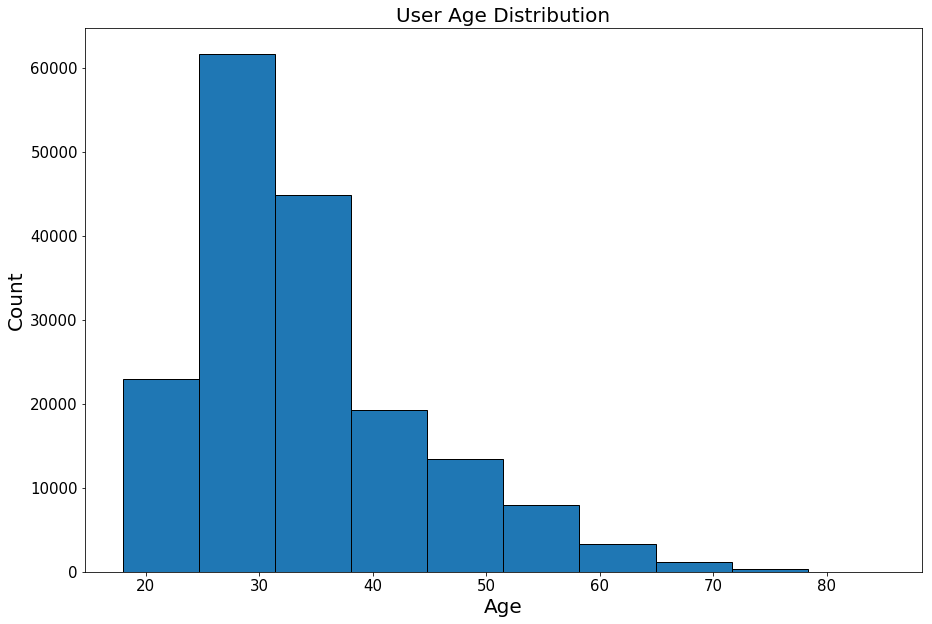

In [35]:
# display the trend of user age through a histogram
df_clean.user_age.hist(figsize=(15,10), grid=False, edgecolor='black');
plt.title('User Age Distribution', fontsize=20);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Age', fontsize=20);
plt.ylabel('Count', fontsize=20);

Based on the above histogram, most studied population aged between 25 and 40 years old.

Let's now looking at the distribution of trips per hours of day, days of week and days of the month

In [36]:
#create a function for my count plot of the Data 
def dtcountplot (df, xVar, labels=None):
    """this function is created to automate the visualization of my dataset
    type used is the bar chart 
    data reflect the count value of trips"""
    
    # set plot dimensions
    plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
    base_color=sns.color_palette()[0]
    data=df_clean.groupby(xVar).start_station_id.count()
    plt.bar(data.index,data,tick_label=labels,color=base_color);
    
    #title the bar chart
    plt.xticks(rotation=90);
    plt.xlabel(xVar.title());
    plt.ylabel("Count of Trips");
    plt.title(f'Count of Trips Vs {xVar}'.title(), y=1.05, fontsize=16, fontweight='bold', color='black');

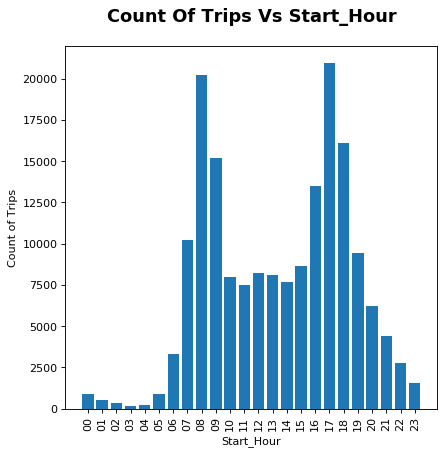

In [37]:
# Distribution of the number of trips based on start hours in February 2019
# call the function
dtcountplot(df_clean,'start_hour', labels=None);
# The number of trips increases twice a day at the morning between 8am and 10am
# and at the evening between 5pm and 8 pm

In [38]:
df_clean.start_weekday.value_counts()

Thursday     33713
Tuesday      30594
Wednesday    28428
Friday       27642
Monday       25633
Sunday       14512
Saturday     14438
Name: start_weekday, dtype: int64

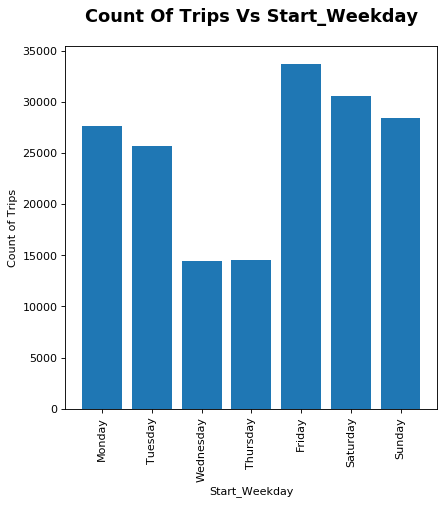

In [39]:
# I have difficulties to set the days in a chronological way
#distribution of Number of trips according to the weekdays in February 2019
labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# call the function
dtcountplot(df_clean,'start_weekday', labels=labels);
# Number of trips is approximately twice more frequent during the weekday comparing to the weekend

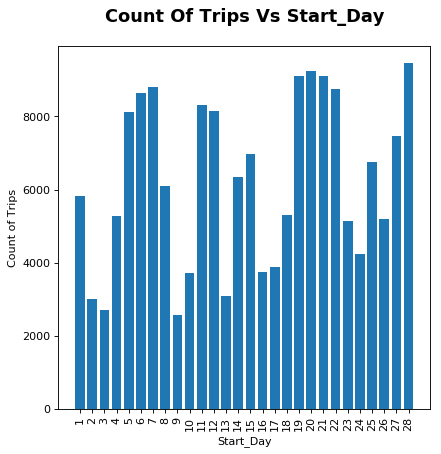

In [40]:
#distribution of the number of trips according to the day of february
labels=np.arange(1, 29, 1)
# call the function
dtcountplot(df_clean,'start_day', labels=labels);
# as per the bar chart below it seems that the number of trips fluctuate 
#during the month. It looks that number of trips increases during the first 
# the third week of February 2019

In [41]:
df_clean.duration_min.mean()

11.741863854595334

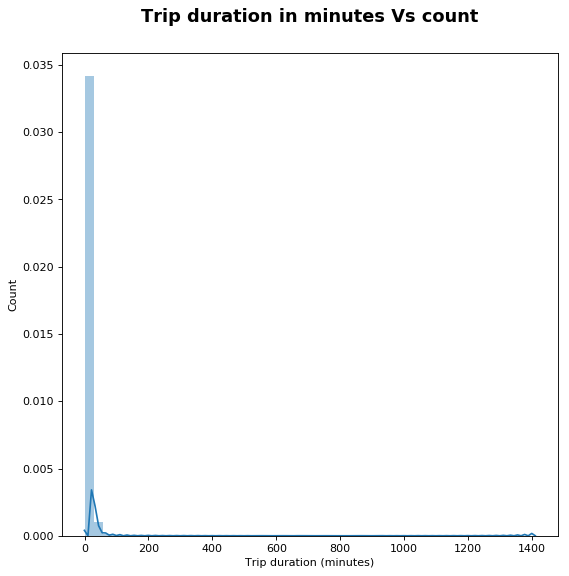

In [42]:
# create a histogram: Trips count Vs duration of the trip
fig=plt.figure(figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
base_color=sns.color_palette()[0]

sns.distplot(df_clean['duration_min'], color=base_color);
plt.xlabel('Trip duration (minutes)');
plt.ylabel('Count');
plt.title('Trip duration in minutes Vs count', y=1.05, fontsize=16, fontweight='bold', color = 'black');

This plot reveals the presence of outliers in the duration of trip. I will remove outlier for better display of the data

Text(0.5,1,'Duration in minutes per trip')

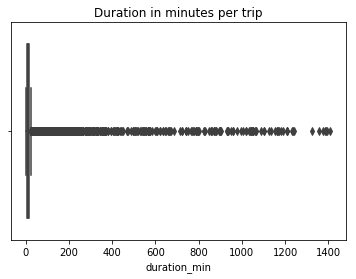

In [43]:
#check for outliers using the boxplot
sns.boxplot(x=df_clean['duration_min'])# most of trips have duration less than 100 minutes 
plt.title('Duration in minutes per trip')

In [44]:
# checking for outliers
df_clean.duration_min.describe() # 75% of trip's duration is less
# than 13.15 mins while the maximum is 1409 mins

count    174960.000000
mean         11.741864
std          27.373520
min           1.016667
25%           5.383333
50%           8.516667
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

In [45]:
# let's check the percentile at 0.01 error
df_clean.duration_min.describe(percentiles=[.95,.99])
# since 99% of trip's duration is less than 53 minutes, 
#so I will plot a graph till 60 minutes

count    174960.000000
mean         11.741864
std          27.373520
min           1.016667
50%           8.516667
95%          25.550000
99%          53.016667
max        1409.133333
Name: duration_min, dtype: float64

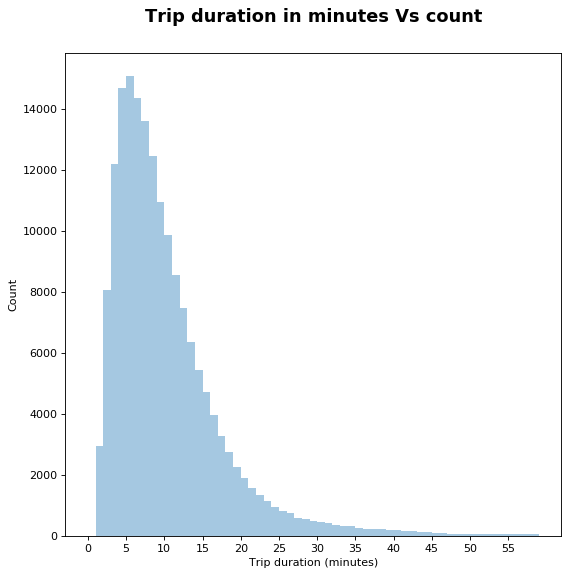

In [46]:
fig=plt.figure(figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
base_color=sns.color_palette()[0]

bins= np.arange(0,60,1)
ticks=np.arange(0,60,5)
sns.distplot(df_clean['duration_min'],bins=bins, kde=False, color=base_color);
plt.xticks(ticks);
plt.xlabel('Trip duration (minutes)');
plt.ylabel('Count');
plt.title('Trip duration in minutes Vs count', y=1.05, fontsize=16, fontweight='bold', color = 'black');

Based on the above histogram, most of trips'duration range between 2 and 25 mins with highest occurance at 10 minutes.

In [47]:
#let's remove the duration_min outliers
df_clean=df_clean.query('duration_min<=60')

In [48]:
#check the maximum of duration trip per minutes
df_clean.duration_min.describe()

count    173570.000000
mean         10.315068
std           7.400627
min           1.016667
25%           5.366667
50%           8.450000
75%          13.000000
max          59.933333
Name: duration_min, dtype: float64

In [49]:
# calculate the average duration after removal of outliers
df_clean.duration_min.mean() # the average duration of the 
# is about 10.31 min 

10.315067888075898

### b. Bivariate Exploration

First let's see the average duration of trips between males and females, and between subscriber and customers

In [50]:
#select male users
male_user=df_clean.member_gender=='Male'
# select female users
female_user=df_clean.member_gender=='Female'

In [51]:
# calculate the mean of trip done by male users
mean_duration_male=df_clean.duration_min[male_user].mean()

In [52]:
# calculate the mean of trip done by female users
mean_duration_female=df_clean.duration_min[female_user].mean()

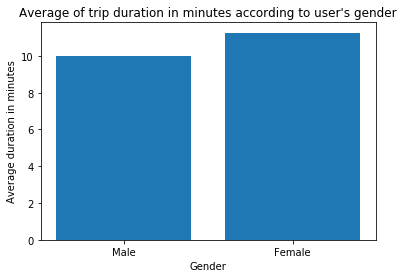

In [53]:
# create bar chart for duration's trip taken by users according to their gender
locations=[1,2]
heights=[mean_duration_male, mean_duration_female]
labels=['Male','Female']
plt.bar(locations, heights, tick_label=labels)

plt.title('Average of trip duration in minutes according to user\'s gender')
plt.xlabel('Gender')
plt.ylabel('Average duration in minutes');
# It looks like females are more likely to spend long time
# during the bike trip than males

Check the weekly usage and average trip duration per minutes per weekdays

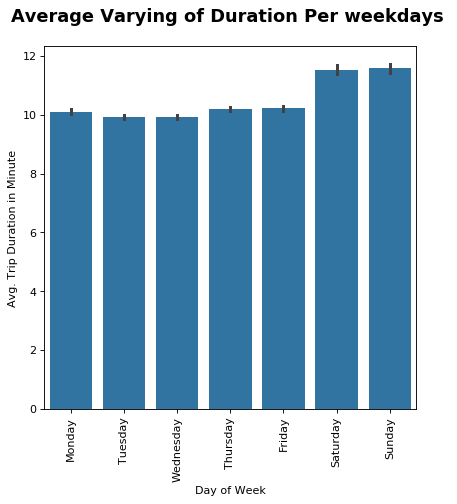

In [54]:
order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig=plt.figure(figsize=(6,6), dpi= 80, facecolor='w', edgecolor='k')

#plotting a bar plot
sns.barplot(data=df_clean, x='start_weekday', y='duration_min', color=base_color, order=order);

plt.xticks( rotation=90);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title('Average Varying of Duration Per weekdays ', y=1.05, fontsize=16, fontweight='bold', color = 'black');

Based on the above bar chart, it looks like the duration of trips in the weekdays is shorter than weekends. Maybe because users at the weekends have more free time than during weekdays.

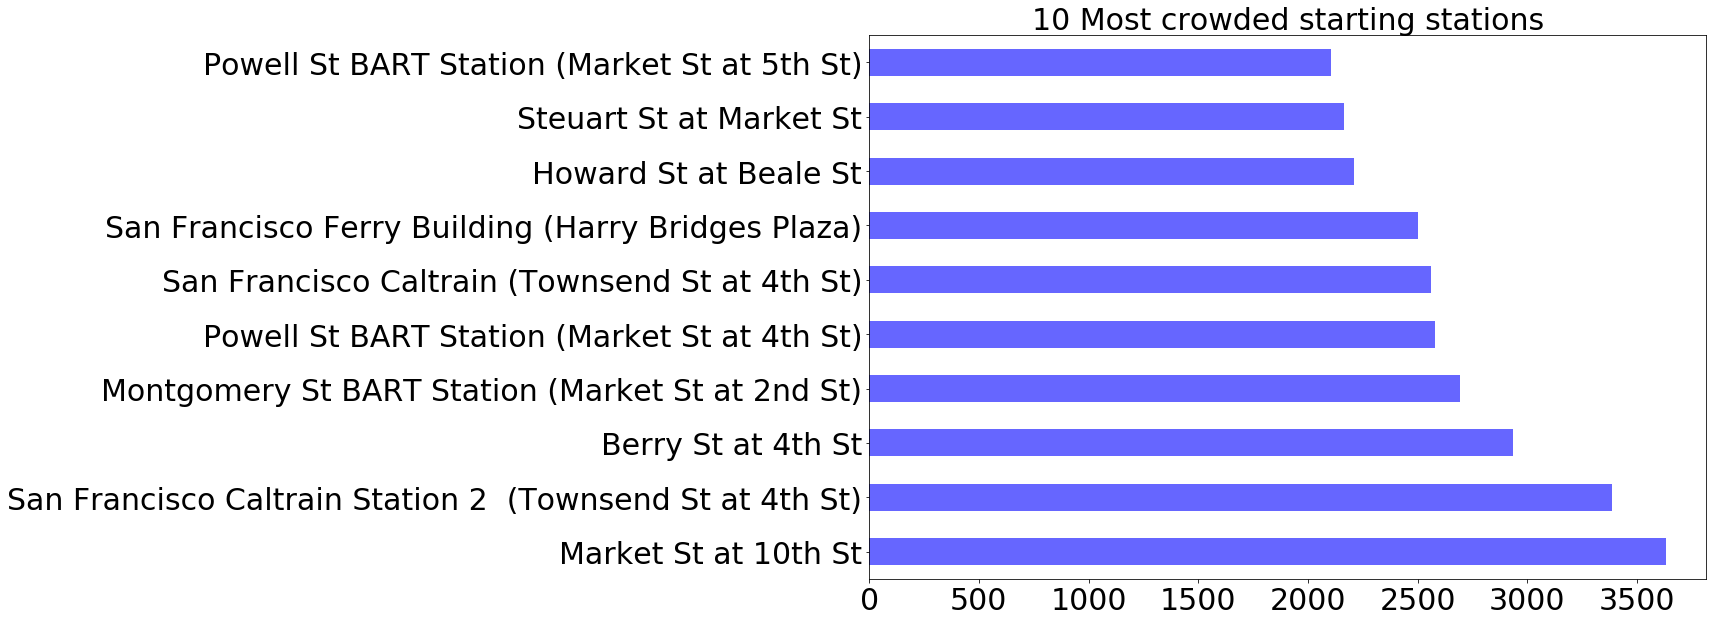

In [55]:
#plot the 10 most starting station in bar chart
plt.figure(figsize=(15,10))
plt.title("10 Most crowded starting stations", size=30)
most_station_name=df_clean.start_station_name.value_counts().sort_values(ascending=False).head(10)
most_station_name.plot(kind='barh', fontsize=30, color='blue', alpha=0.6);

Based on the above bar chart, the 'Market St at 10th St' is the most crowded station where users start their trips  from followed by San Francisco Caltrain Station2.

In [56]:
#Convert the "start_weekday" column from a plain object type into an ordered categorical type
#Days of week
weekdays=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Returns the days of weeks with the categories and orderedness
start_weekdays=pd.api.types.CategoricalDtype(ordered=True, categories=weekdays)

# Use pandas astype() to convert the "start_weekday" column from a plain object type
# into an ordered categorical type
df_clean['start_weekday']=df_clean['start_weekday'].astype(start_weekdays);

In [57]:
#Use group by () and size() to get the number of users and each combination
# of the two variable levels as a pandas series
user_counts = df_clean.groupby(['start_weekday', 'user_type']).size()
# Use Series.reset_index() to convert a series into a dataframe object
user_counts=user_counts.reset_index(name='count')

In [58]:
#Use DataFrame.pivot() to rearrange the data, to have weekday in rows
user_counts=user_counts.pivot(index='start_weekday', columns='user_type', values= 'count')

Text(0.5,1,'Users types Vs Weekdays')

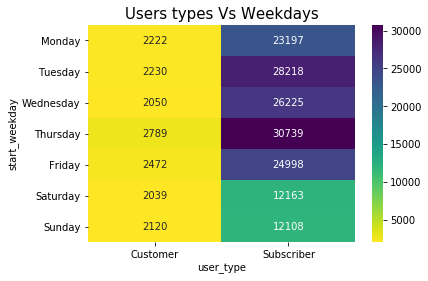

In [59]:
#plot the heatmap
sns.heatmap(user_counts, annot=True, fmt='d', cmap='viridis_r')
plt.title('Users types Vs Weekdays', fontsize=15)

From the above heatmap, trends show difference between customers and subscribers. Customers often use the service during Thursday and Friday comparing to Subscribers where the usage of service seem to be similar during the regular weekdays with higher pick on Thursday and Tuesday. Furthermore, the number of use of Bike is much more higher in subscriber comparing to customers which mean that these user may use the service for daily work and not only for recreational activities.

### c. Multivariate Exploration

### Bike rides by Gender

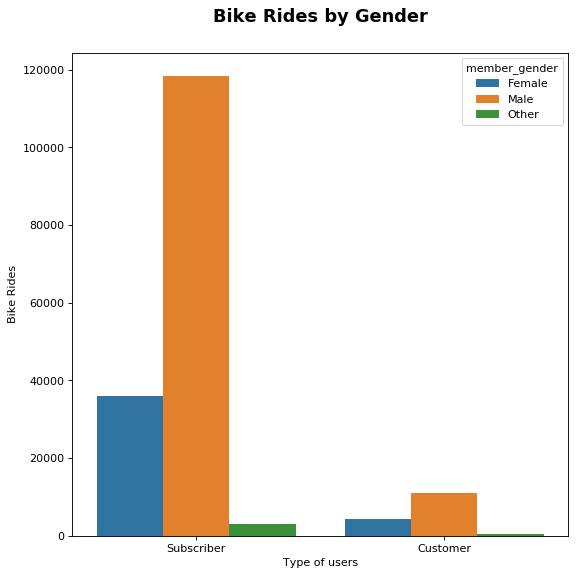

In [60]:
order=['Subscriber', 'Customer']
fig=plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')

sns.countplot(data=df_clean, x='user_type', hue='member_gender', order=order);
plt.xlabel('Type of users');
plt.ylabel('Bike Rides');
plt.title('Bike Rides by Gender',y=1.05, fontsize=16, fontweight='bold', color = 'black');

There are subscribers male and female users more than customers users, and the most subscribers and customers are male which means that males are more likely to practice cycling than females.

### Bike Rides of 2 types of users by age groups and weekday

I will divide the age groups into 3 groups: from 20-40years, 40 to 60 years and 40-80 years.Then, I will extract the weekday data for each age groups.

In [61]:
#The below process is inspired from this link: 
#https://github.com/saiogirala/Ford_Bike_Communicating_Findings/blob/master/Exploratory_Data_Analysis.ipynb

#Convert the "start_weekday" column from a plain object type into an ordered categorical type
#Days of week
weekdays=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_clean['start_hour']=df_clean['start_hour'].astype(int)

# Returns the days of weeks with the categories and orderedness
start_weekdays=pd.api.types.CategoricalDtype(ordered=True, categories=weekdays)

In [62]:
# extract the data of subscribers group aged between 20 and 40 years 
df_age1=df_clean[(df_clean['user_age']>=20) & (df_clean['user_age']<40) & (df_clean['start_hour']>6) & (df_clean['user_type']=='Subscriber')]
subscriber_age1=df_age1.groupby(['start_weekday', 'start_hour'])
subscriber_count1=subscriber_age1.agg({'bike_id':'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [63]:
# extract the data of subscribers group aged between 40 and 60 years 
df_age2=df_clean[(df_clean['user_age']>=40) & (df_clean['user_age']<60) & (df_clean['start_hour']>6) & (df_clean['user_type']=='Subscriber')]
subscriber_age2=df_age2.groupby(['start_weekday', 'start_hour'])
subscriber_count2=subscriber_age2.agg({'bike_id':'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [64]:
# extract the data of subscribers group aged between 60 and 80 years 
df_age3=df_clean[(df_clean['user_age']>=60) & (df_clean['user_age']<80) & (df_clean['start_hour']>6) & (df_clean['user_type']=='Subscriber')]
subscriber_age3=df_age2.groupby(['start_weekday', 'start_hour'])
subscriber_count3=subscriber_age2.agg({'bike_id':'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [65]:
#Convert the "start_weekday" column from a plain object type into an ordered categorical type
#Days of week
weekdays=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Returns the days of weeks with the categories and orderedness
start_weekdays=pd.api.types.CategoricalDtype(ordered=True, categories=weekdays)

In [66]:
# Extract weekdays for age groups 20 and 40 and Use pandas astype() to convert the "start_weekday" 
#column from a plain object type into an ordered categorical type
subscriber_count1['start_weekday']=subscriber_count1['start_weekday'].astype(start_weekdays);

In [67]:
# Extract weekdays for age groups 40 and 60 and Use pandas astype() to convert the "start_weekday" 
#column from a plain object type into an ordered categorical type
subscriber_count2['start_weekday']=subscriber_count2['start_weekday'].astype(start_weekdays);

In [68]:
# Extract weekdays for age groups 60 and 80 and Use pandas astype() to convert the "start_weekday" 
#column from a plain object type into an ordered categorical type
subscriber_count3['start_weekday']=subscriber_count3['start_weekday'].astype(start_weekdays);

In [69]:
#calculate the Rank in descending order for 20 to 40 years age group
subscriber_count1['rank']=subscriber_count1['count'].rank(ascending=False).astype(int)

In [70]:
#calculate the Rank in descending order for 40 to 60 years age group
subscriber_count2['rank']=subscriber_count2['count'].rank(ascending=False).astype(int)

In [71]:
#calculate the Rank in descending order for 60 to 80 years age group
subscriber_count3['rank']=subscriber_count3['count'].rank(ascending=False).astype(int)

In [72]:
#create pivot table for 20 to 40 years age 
subscriber_pivot1=subscriber_count1.pivot(index='start_hour', columns='start_weekday', values= 'rank')

In [73]:
# create pivot table for 40 to 60 years age
subscriber_pivot2=subscriber_count2.pivot(index='start_hour', columns='start_weekday', values= 'rank')

In [74]:
# create pivot table for 60 to 80 years age
subscriber_pivot3=subscriber_count3.pivot(index='start_hour', columns='start_weekday', values= 'rank')

In [75]:
# extract the data of customers group aged between 20 and 40 years 
df_age4=df_clean[(df_clean['user_age']>=20) & (df_clean['user_age']<40) & (df_clean['start_hour']>6) & (df_clean['user_type']=='Customer')]
customer_age4=df_age4.groupby(['start_weekday', 'start_hour'])
customer_count4=customer_age4.agg({'bike_id':'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [76]:
# extract the data of Customers group aged between 40 and 60 years 
df_age5=df_clean[(df_clean['user_age']>=40) & (df_clean['user_age']<60) & (df_clean['start_hour']>6) & (df_clean['user_type']=='Customer')]
customer_age5=df_age5.groupby(['start_weekday', 'start_hour'])
customer_count5=customer_age5.agg({'bike_id':'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [77]:
# extract the data of subscribers group aged between 60 and 80 years 
df_age6=df_clean[(df_clean['user_age']>=60) & (df_clean['user_age']<80) & (df_clean['start_hour']>6) & (df_clean['user_type']=='Customer')]
customer_age6=df_age6.groupby(['start_weekday', 'start_hour'])
customer_count6=customer_age6.agg({'bike_id':'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [78]:
#Convert the "start_weekday" column from a plain object type into an ordered categorical type
#Days of week
weekdays=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Returns the days of weeks with the categories and orderedness
start_weekdays=pd.api.types.CategoricalDtype(ordered=True, categories=weekdays)

In [79]:
# Extract weekdays for age groups 20 and 40 for customers and Use pandas astype() to convert the "start_weekday" 
#column from a plain object type into an ordered categorical type
customer_count4['start_weekday']=customer_count4['start_weekday'].astype(start_weekdays);

In [80]:
# Extract weekdays for age groups 40 and 60 and Use pandas astype() to convert the "start_weekday" 
#column from a plain object type into an ordered categorical type
customer_count5['start_weekday']=customer_count5['start_weekday'].astype(start_weekdays);

In [81]:
# Extract weekdays for age groups 60 and 80 and Use pandas astype() to convert the "start_weekday" 
#column from a plain object type into an ordered categorical type
customer_count6['start_weekday']=customer_count6['start_weekday'].astype(start_weekdays);

In [82]:
#calculate the Rank in descending order for 20 to 40 years age group
customer_count4['rank']=customer_count4['count'].rank(ascending=False).astype(int)

In [83]:
#calculate the Rank in descending order for 40 to 60 years age group
customer_count5['rank']=customer_count5['count'].rank(ascending=False).astype(int)

In [84]:
#calculate the Rank in descending order for 60 to 80 years age group
customer_count6['rank']=customer_count6['count'].rank(ascending=False).astype(int)

In [85]:
#create pivot table for 20 to 40 years age 
customer_pivot4=customer_count4.pivot(index='start_hour', columns='start_weekday', values= 'rank')

In [86]:
# create pivot table for 40 to 60 years age
customer_pivot5=customer_count5.pivot(index='start_hour', columns='start_weekday', values= 'rank')

In [87]:
# create pivot table for 60 to 80 years age
customer_pivot6=customer_count6.pivot(index='start_hour', columns='start_weekday', values='rank')

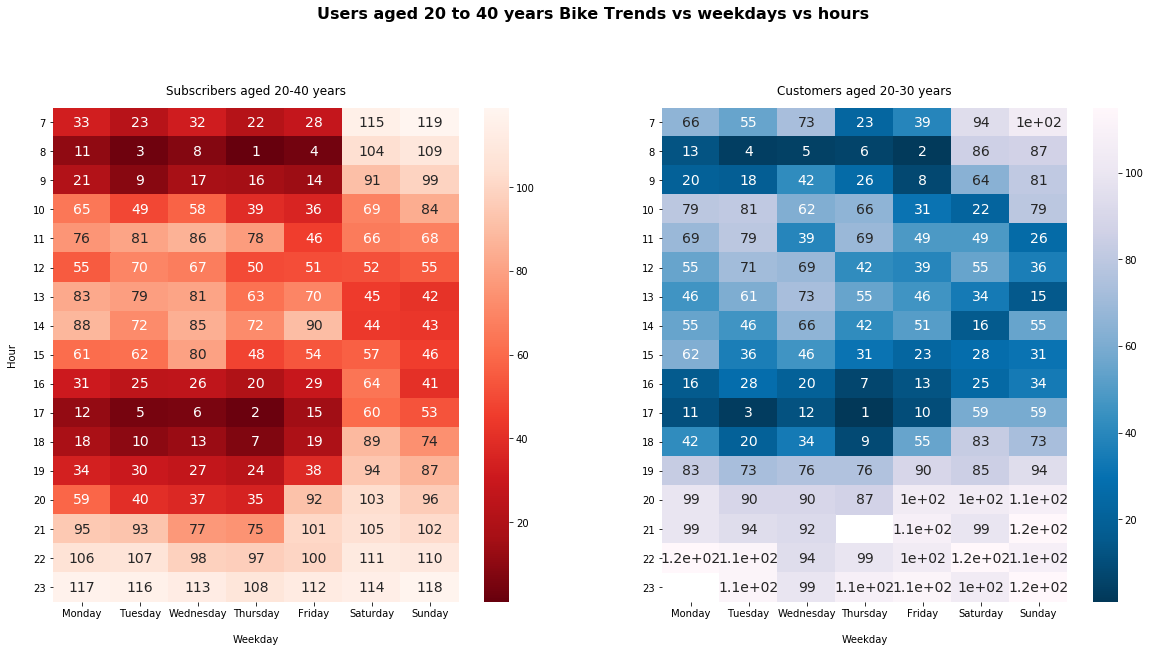

In [88]:
#create heatmap for subscribers and customers aged 20 to 40 years vs weekday vs day hours
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.suptitle('Users aged 20 to 40 years Bike Trends vs weekdays vs hours', fontsize=16, fontweight='semibold', y=0.95)
sns.heatmap(subscriber_pivot1, fmt='d', annot=True, cmap='Reds_r', annot_kws={"size":14})
plt.title("Subscribers aged 20-40 years", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hour', labelpad=16)
plt.yticks(rotation=360)
plt.subplot(2,2,2)
sns.heatmap(customer_pivot5, annot=True, cmap='PuBu_r', annot_kws={"size":14})
plt.title("Customers aged 20-30 years", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360);

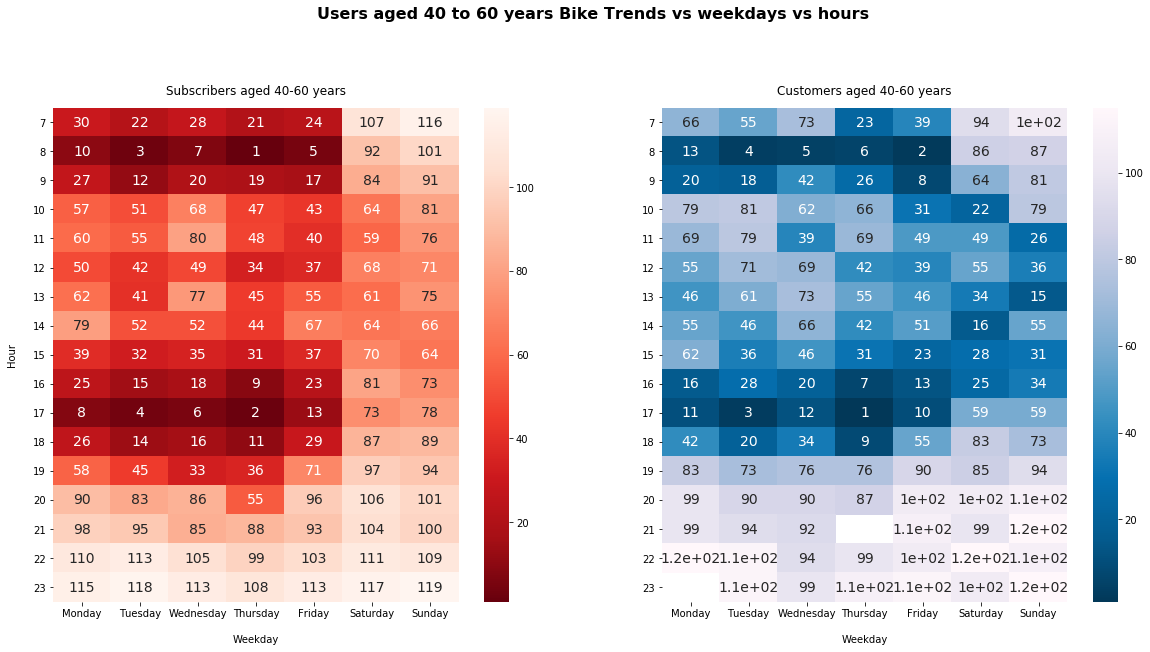

In [89]:
#create heatmap for subscribers and customers aged 40 to 60 years vs weekday vs day hours
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.suptitle('Users aged 40 to 60 years Bike Trends vs weekdays vs hours', fontsize=16, fontweight='semibold', y=0.95)
sns.heatmap(subscriber_pivot2, fmt='d', annot=True, cmap='Reds_r', annot_kws={"size":14})
plt.title("Subscribers aged 40-60 years", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hour', labelpad=16)
plt.yticks(rotation=360)
plt.subplot(2,2,2)
sns.heatmap(customer_pivot5, annot=True, cmap='PuBu_r', annot_kws={"size":14})
plt.title("Customers aged 40-60 years", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360);

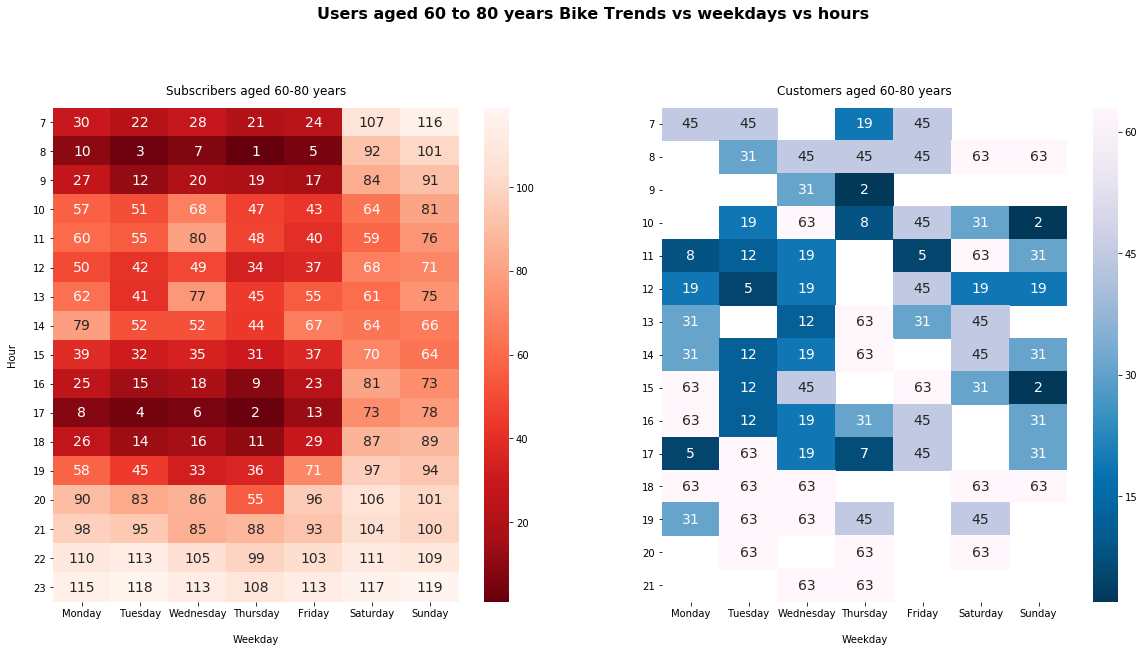

In [90]:
#create heatmap for subscribers and customers aged 60 to 80 years vs weekday vs day hours
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.suptitle('Users aged 60 to 80 years Bike Trends vs weekdays vs hours', fontsize=16, fontweight='semibold', y=0.95)
sns.heatmap(subscriber_pivot3, fmt='d', annot=True, cmap='Reds_r', annot_kws={"size":14})
plt.title("Subscribers aged 60-80 years", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hour', labelpad=16)
plt.yticks(rotation=360)
plt.subplot(2,2,2)
sns.heatmap(customer_pivot6, annot=True, cmap='PuBu_r', annot_kws={"size":14})
plt.title("Customers aged 60-80 years", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360);

Subscribers of all ages use the service during the weekdays from Monday to Friday with higher frequency on Thursday. Furthermore, subscribers of all age groups take ride bikes morning between 07:00 to 09:00 am. But evening subscribers of group age 40 to 60 and 60 to 80 use the service between 03:00pm to 06:00pm with an interval narrower than the first age group (20 to 40 years) who took the service starting 04:00pm to 10:00pm.

On the other hand, customers show high use of the service morning at 08:00 am and evening at 05:00pm. Customers of both 20 to 40 years group and 40 to 60 years group are more likely to use bikes during the weekend (Saturday and Sunday). 
Users aged 60 years and above tend to be subscribers more than customers.